<a href="https://colab.research.google.com/github/anirudhpnbb/Primitive-Neurons/blob/master/MP_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# McCulloch Pitts Neuron

## Loading the dataset and exploring it.

In [1]:
import sklearn.datasets
import numpy as np

In [2]:
# Loading the dataset.
breast_cancer = sklearn.datasets.load_breast_cancer()

In [4]:
# Seperating the dataset into X and y.
X = breast_cancer.data
y = breast_cancer.target

In [7]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [8]:
print("Shape of X and y are {0}{1}".format(X.shape, y.shape))

Shape of X and y are (569, 30)(569,)


In [10]:
import pandas as pd

data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [11]:
data["class"] = breast_cancer.target

In [12]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [15]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [18]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [19]:
data.groupby("class").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Test train split.

In [20]:
X = data.drop("class", 1)
y = data["class"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    stratify = y,
                                                    random_state = 1)

In [42]:
print("Shape of X and y are {0}{1} and \nthe shape of X_train , X_test, y_train,"
      " y_test is {2}{3}{4}{5}".format(X.shape, y.shape, X_train.shape,
                                      X_test.shape, y_train.shape, y_test.shape))

Shape of X and y are (569, 30)(569,) and 
the shape of X_train , X_test, y_train, y_test is (512, 30)(57, 30)(512,)(57,)


In [43]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


## Binarization of input as MP Neuron only takes binary as input

In [44]:
import matplotlib.pyplot as plt

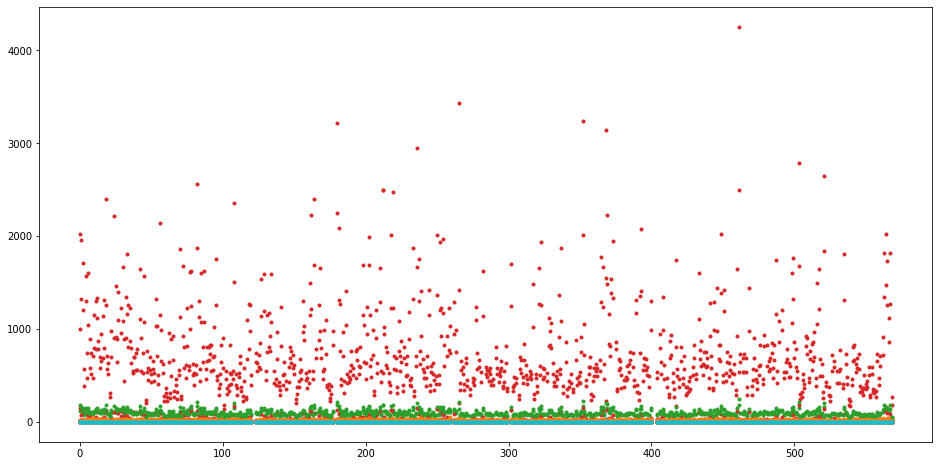

In [47]:
plt.figure(figsize = (16, 8))
plt.plot(X_train, ".")
plt.show()

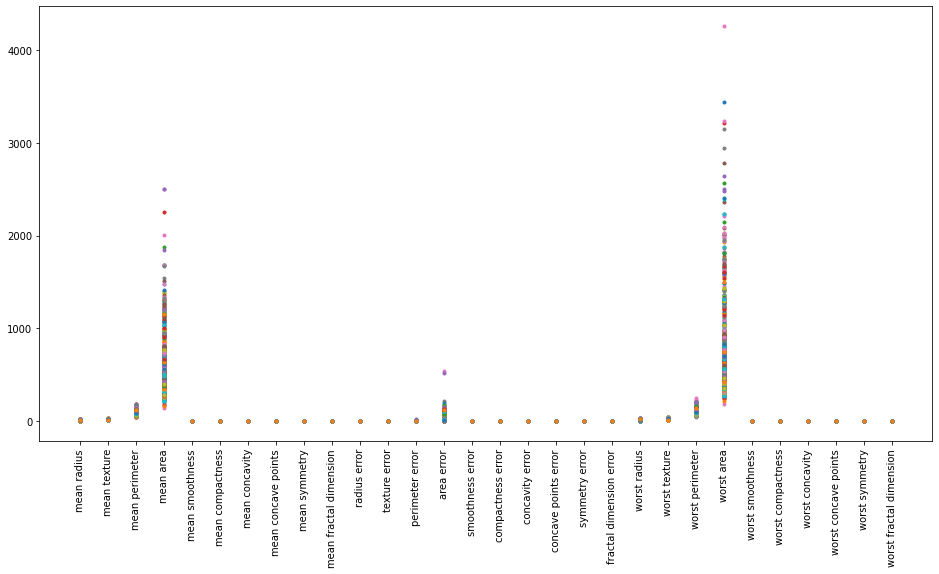

In [49]:
plt.figure(figsize = (16, 8))
plt.plot(X_train.T, ".")
plt.xticks(rotation = "vertical")
plt.show()

In [51]:
X_binarized_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

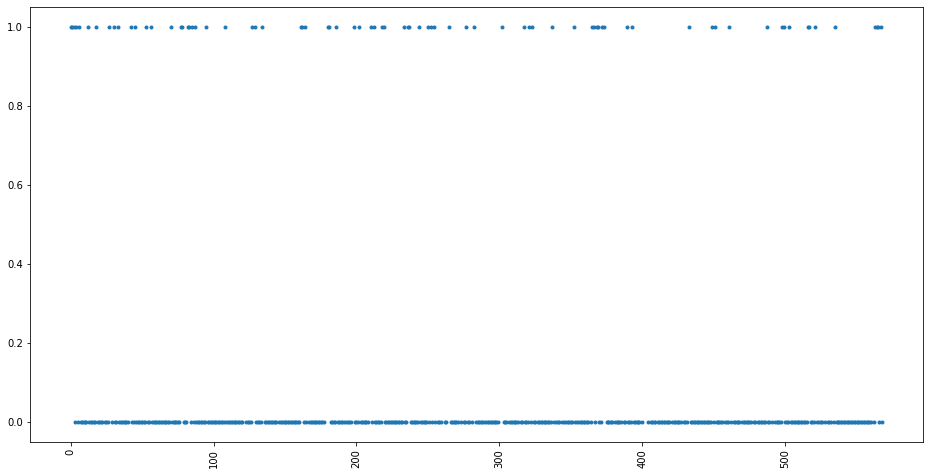

In [53]:
plt.figure(figsize = (16, 8))
plt.plot(X_binarized_3_train, ".")
plt.xticks(rotation = "vertical")
plt.show()

In [79]:
X_binarized_train = X_train.apply(pd.cut, bins = 2, labels = [0, 1])

In [55]:
X_binarized_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
430,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


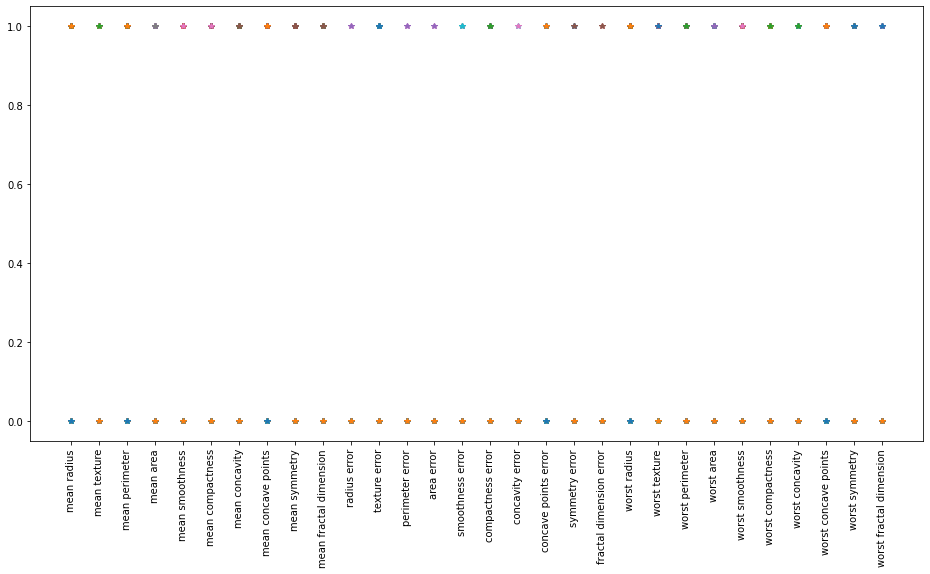

In [58]:
plt.figure(figsize = (16, 8))
plt.plot(X_binarized_train.T, "*")
plt.xticks(rotation = "vertical")
plt.show()

In [80]:
X_binarized_test = X_test.apply(pd.cut, bins = 2, labels = [0, 1])

In [61]:
X_binarized_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
145,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
272,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1
480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
256,1,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1
326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1
261,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
432,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,0
401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [81]:
X_binarized_test = X_binarized_test.values
X_binarized_train = X_binarized_train.values

In [63]:
print("Type of binarized train {0} and binarized test {1}".
      format(type(X_binarized_train), type(X_binarized_test)))

Type of binarized train <class 'numpy.ndarray'> and binarized test <class 'numpy.ndarray'>


## MP Neuron model

In [66]:
from random import randint

In [71]:
b = 3
i = randint(0, X_binarized_train.shape[0])
print("For now: ", i)
if (np.sum(X_binarized_train[100, :]) >= b):
  print("MP Neuron inference is malignant.")
else:
  print("MP Neuron inference is benign.")

if (y_train[i] == 1):
  print("Ground truth is malignant.")
else:
  print("Ground truth is benign.")

For now:  349
MP Neuron inference is benign.
Ground truth is malignant.


In [73]:
b = 3
y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarized_train, y_train):
  y_pred = np.sum(x)>=b
  y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/X_binarized_train.shape[0])

77 0.150390625


In [82]:
for b in range(X_binarized_train.shape[1] + 1):
  y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarized_train, y_train):
    y_pred = np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarized_train.shape[0])

0 0.626953125
1 0.240234375
2 0.185546875
3 0.150390625
4 0.154296875
5 0.181640625
6 0.21484375
7 0.244140625
8 0.275390625
9 0.298828125
10 0.3125
11 0.328125
12 0.3359375
13 0.34375
14 0.3515625
15 0.357421875
16 0.3671875
17 0.369140625
18 0.373046875
19 0.373046875
20 0.373046875
21 0.373046875
22 0.373046875
23 0.373046875
24 0.373046875
25 0.373046875
26 0.373046875
27 0.373046875
28 0.373046875
29 0.373046875
30 0.373046875


So, basically at zero is where we have more accuracy.

In [83]:
X_binarized_train = X_train.apply(pd.cut, bins = 2, labels = [1, 0])
X_binarized_test = X_test.apply(pd.cut, bins = 2, labels = [1, 0])

In [84]:
X_binarized_test = X_binarized_test.values
X_binarized_train = X_binarized_train.values

In [85]:
for b in range(X_binarized_train.shape[1] + 1):
  y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarized_train, y_train):
    y_pred = np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarized_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


When we look at the groupby we did above, we find that the benign values are actually more than the malignant whereas according to the data we actually had more malignant values. So, we had to re do the binarization by swapping the values of "0" and "1"

In [90]:
from sklearn.metrics import accuracy_score

b = 28 # Looking for 28 as we got a very good accuracy,
       # at the value 28 of b with the train data.
y_pred_test = []
accurate_rows = 0

for x in X_binarized_test:
  y_pred = np.sum(x)>=b
  y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test, y_test)
print(b, accuracy)

28 0.7894736842105263


## MP Neuron class

In [91]:
class MPNeuron:

  def __init__(self):
    self.b = None

  def model(self, x):
    return (sum(x) >= self.b)

  def predict(self, X):
    y = []
    for i in X:
      result = self.model(i)
      y.append(result)
    return np.array(y)

  def fit(self, X, y):
    accuracy = {}
    for b in range(X.shape[1] + 1):
      self.b = b
      y_pred = self.predict(X)
      accuracy[b] = accuracy_score(y_pred, y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    print("Optimal value of b is: ", best_b)
    print("Highest accuracy is: ", accuracy[best_b])

In [98]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarized_train, y_train)

Optimal value of b is:  28
Highest accuracy is:  0.849609375


In [99]:
y_test_predict = mp_neuron.predict(X_binarized_test)
accuracy_test = accuracy_score(y_test_predict, y_test)

In [100]:
accuracy_test

0.7894736842105263